<a href="https://colab.research.google.com/github/ArnabSen08/Machine-Learning-Code/blob/main/Hands_on_implementation_of_LightGBM_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pip --user -q --no-warn-script-location
!pip install numpy pandas sklearn matplotlib lightgbm --user -q --no-warn-script-location

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)


{'status': 'ok', 'restart': True}

In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/titanic.csv') ## Reading the CSV file

In [3]:
data.drop(['Sex'],axis=1,inplace=True) ## Dropping the sex feature from the dataset


In [4]:
data ## Visualizing the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,22.0,1,0,7.2500,3
1,2,1,1,38.0,1,0,71.2833,1
2,3,1,3,26.0,0,0,7.9250,3
3,4,1,1,35.0,1,0,53.1000,3
4,5,0,3,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
884,887,0,2,27.0,0,0,13.0000,3
885,888,1,1,19.0,0,0,30.0000,3
886,889,0,3,60.0,1,2,23.4500,3
887,890,1,1,26.0,0,0,30.0000,1


In [5]:
data.info() ## Basic summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.7 KB


In [6]:
# define input and output feature
x = data.drop(['Embarked','PassengerId'],axis=1)
y = data.Embarked

In [7]:
data.Embarked.value_counts()

3    644
1    168
2     77
Name: Embarked, dtype: int64

In [8]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [9]:
model = lgb.LGBMClassifier(random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20)

[20]	training's multi_logloss: 0.383427	valid_0's multi_logloss: 0.487773
[40]	training's multi_logloss: 0.273051	valid_0's multi_logloss: 0.45101
[60]	training's multi_logloss: 0.214268	valid_0's multi_logloss: 0.457868
[80]	training's multi_logloss: 0.174929	valid_0's multi_logloss: 0.470101
[100]	training's multi_logloss: 0.146926	valid_0's multi_logloss: 0.485666


LGBMClassifier(random_state=42)

In [10]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9647
Testing accuracy 0.8163


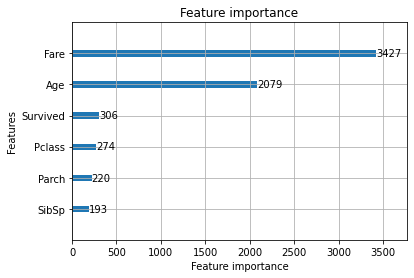

In [11]:
lgb.plot_importance(model)

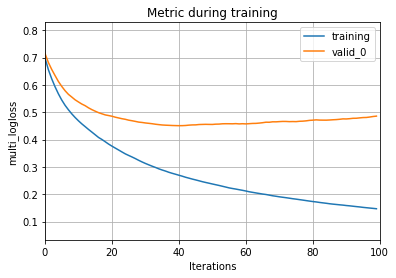

In [12]:
lgb.plot_metric(model) ## Observing the log loss for the model

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


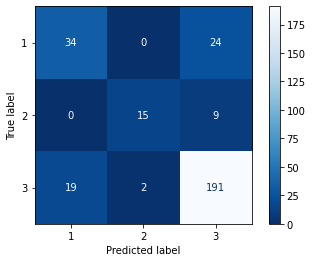

In [13]:
metrics.plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r') ## Plotting the confusion matrix

In [14]:
print(metrics.classification_report(y_test,model.predict(x_test))) ## Classification report of LGBM Classifier

              precision    recall  f1-score   support

           1       0.64      0.59      0.61        58
           2       0.88      0.62      0.73        24
           3       0.85      0.90      0.88       212

    accuracy                           0.82       294
   macro avg       0.79      0.70      0.74       294
weighted avg       0.81      0.82      0.81       294

